In [1]:
import os

os.chdir('/Users/edwardchiu/Desktop/projects/baha-anime-analysis')
os.getcwd()

'/Users/edwardchiu/Desktop/projects/baha-anime-analysis'

In [2]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

In [3]:
import yaml
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

In [4]:
from transformers import BertTokenizer, BertModel
import torch

# Load the tokenizer and model
tokenizer = BertTokenizer.from_pretrained("hfl/chinese-roberta-wwm-ext")
model = BertModel.from_pretrained("hfl/chinese-roberta-wwm-ext")

In [ ]:
with open('conf/app.yml') as f:
    app_config = yaml.safe_load(f)

In [ ]:
url = 'https://ani.gamer.com.tw/animeVideo.php?sn=40525'
user_agent = app_config['website']['user_agent']
# ua = UserAgent()
# user_agent = ua.random
headers = {'User-Agent': user_agent}

In [ ]:
req = requests.get(url, headers=headers)
req

In [ ]:
soup = BeautifulSoup(req.text, 'html.parser')

In [ ]:
soup.select_one('.ACG-box1listB > li > a')

In [ ]:
intro = soup.select_one('.data-intro > p').text

In [ ]:
intro.split('\r＜')[0].strip()

In [ ]:
# Tokenize and encode the input text
inputs = tokenizer(intro, return_tensors="pt", truncation=True, max_length=512)
outputs = model(**inputs)

In [ ]:
outputs

In [ ]:
# Get the hidden states
hidden_states = outputs.last_hidden_state

In [ ]:
# Take the embedding of the [CLS] token (first token)
cls_embedding = hidden_states[:, 0, :]  # Shape: (batch_size, hidden_dim)

In [ ]:
cls_embedding.squeeze().detach().tolist()

In [5]:
def intro_feature_extraction(intro):
    try:
        # Tokenize and encode the input text
        inputs = tokenizer(intro, return_tensors="pt", truncation=True, max_length=512)
        outputs = model(**inputs)

        # Get the hidden states
        hidden_states = outputs.last_hidden_state

        # Take the embedding of the [CLS] token (first token)
        cls_embedding = hidden_states[:, 0, :]  # Shape: (batch_size, hidden_dim)
        feature = cls_embedding.squeeze().detach().tolist()
        return feature
    except:
        return None

In [6]:
df_all_anime = pd.read_csv('data/all_anime.csv')
df_all_anime.head()

,name,thumbnail,total_view,total_episode,avg_view,link,score,score_count,score_rate,first_launched_date,author,director,agent,animator,types,intro
0,青之壬生浪,https://p2.bahamut.com.tw/B/ACG/c/23/000013552...,36000.0,4,9000.0,https://ani.gamer.com.tw/animeRef.php?sn=113677,4.8,336.0,0.009333,2024-10-19,安田剛士,羽原久美子,曼迪,MAHO FILM,"['青春', '勵志', '歷史']",本作品以約160年前的幕末京都為舞台，描繪新選組的青春物語。因黑船來襲而動亂頻繁的幕末京都裡...
1,香蕉喵遊世界,https://p2.bahamut.com.tw/B/ACG/c/00/000014150...,21000.0,8,2625.0,https://ani.gamer.com.tw/animeRef.php?sn=113633,4.7,140.0,0.006667,2024-10-14,Q-LiA,矢立恭,Ani-One,TMS Entertainment（第6工作室）×Lesprit,"['溫馨', '悠閒', '泡麵番', '闔家觀賞']",在某座星球上，誕生了一隻不可思議的生物。牠的名字叫「香蕉喵」，是藏在香蕉裡的神秘小貓咪，沒有...
2,平凡職業造就世界最強 第三季,https://p2.bahamut.com.tw/B/ACG/c/96/000012709...,517000.0,5,103400.0,https://ani.gamer.com.tw/animeRef.php?sn=113635,4.9,4173.0,0.008072,2024-10-14,白米良,岩永彰,木棉花,asread.,"['動作', '冒險', '奇幻', '異世界', '魔法']",南雲始一行人打敗了神之使徒「諾因」，並順利擊退侵略王都的魔人族。在攻略剩餘的兩個大迷宮前，為...
3,香格里拉・開拓異境～糞作獵手挑戰神作～ 第二季,https://p2.bahamut.com.tw/B/ACG/c/12/000013861...,848000.0,5,169600.0,https://ani.gamer.com.tw/animeRef.php?sn=113665,5.0,6808.0,0.008028,2024-10-13,硬梨菜、不二涼介,窪岡俊之、池下博紀,木棉花,C2C,"['動作', '冒險', '奇幻']",「你是為了什麼而玩遊戲的？」\r如果世界上的遊戲有100款神作，那麼也就有存在著1000款糞...
4,魔王 2099,https://p2.bahamut.com.tw/B/ACG/c/43/000013124...,412000.0,5,82400.0,https://ani.gamer.com.tw/animeRef.php?sn=113662,4.9,3793.0,0.009206,2024-10-13,紫大悟,安藤良,木棉花,J.C.STAFF,"['動作', '奇幻', '魔法', '科幻', '職場']",這裡是統合曆2099年──新宿市。在被滅亡的500年後，傳說中的魔王「貝爾托爾」再次降臨於發...


In [48]:
df_all_anime['intro'] = df_all_anime['intro'].fillna(df_all_anime['name'])
df_all_anime['intro_feature'] = df_all_anime['intro'].apply(intro_feature_extraction)

In [50]:
df_all_anime.head()

,name,thumbnail,total_view,total_episode,avg_view,link,score,score_count,score_rate,first_launched_date,author,director,agent,animator,types,intro,intro_feature
0,青之壬生浪,https://p2.bahamut.com.tw/B/ACG/c/23/000013552...,36000.0,4,9000.0,https://ani.gamer.com.tw/animeRef.php?sn=113677,4.8,336.0,0.009333,2024-10-19,安田剛士,羽原久美子,曼迪,MAHO FILM,"['青春', '勵志', '歷史']",本作品以約160年前的幕末京都為舞台，描繪新選組的青春物語。因黑船來襲而動亂頻繁的幕末京都裡...,"[0.36482474207878113, 0.7688465118408203, 0.90..."
1,香蕉喵遊世界,https://p2.bahamut.com.tw/B/ACG/c/00/000014150...,21000.0,8,2625.0,https://ani.gamer.com.tw/animeRef.php?sn=113633,4.7,140.0,0.006667,2024-10-14,Q-LiA,矢立恭,Ani-One,TMS Entertainment（第6工作室）×Lesprit,"['溫馨', '悠閒', '泡麵番', '闔家觀賞']",在某座星球上，誕生了一隻不可思議的生物。牠的名字叫「香蕉喵」，是藏在香蕉裡的神秘小貓咪，沒有...,"[0.619700014591217, 0.0547364205121994, 0.3429..."
2,平凡職業造就世界最強 第三季,https://p2.bahamut.com.tw/B/ACG/c/96/000012709...,517000.0,5,103400.0,https://ani.gamer.com.tw/animeRef.php?sn=113635,4.9,4173.0,0.008072,2024-10-14,白米良,岩永彰,木棉花,asread.,"['動作', '冒險', '奇幻', '異世界', '魔法']",南雲始一行人打敗了神之使徒「諾因」，並順利擊退侵略王都的魔人族。在攻略剩餘的兩個大迷宮前，為...,"[0.42784765362739563, 0.8475140929222107, 0.77..."
3,香格里拉・開拓異境～糞作獵手挑戰神作～ 第二季,https://p2.bahamut.com.tw/B/ACG/c/12/000013861...,848000.0,5,169600.0,https://ani.gamer.com.tw/animeRef.php?sn=113665,5.0,6808.0,0.008028,2024-10-13,硬梨菜、不二涼介,窪岡俊之、池下博紀,木棉花,C2C,"['動作', '冒險', '奇幻']",「你是為了什麼而玩遊戲的？」\r如果世界上的遊戲有100款神作，那麼也就有存在著1000款糞...,"[0.7400757670402527, 0.7505607604980469, 0.541..."
4,魔王 2099,https://p2.bahamut.com.tw/B/ACG/c/43/000013124...,412000.0,5,82400.0,https://ani.gamer.com.tw/animeRef.php?sn=113662,4.9,3793.0,0.009206,2024-10-13,紫大悟,安藤良,木棉花,J.C.STAFF,"['動作', '奇幻', '魔法', '科幻', '職場']",這裡是統合曆2099年──新宿市。在被滅亡的500年後，傳說中的魔王「貝爾托爾」再次降臨於發...,"[-0.15343107283115387, 0.6935722231864929, 0.6..."


In [38]:
df_intro = df_all_anime[['name', 'intro', 'intro_feature']].dropna(ignore_index=True)
df_intro.head()

,name,intro,intro_feature
0,青之壬生浪,本作品以約160年前的幕末京都為舞台，描繪新選組的青春物語。因黑船來襲而動亂頻繁的幕末京都裡...,"[0.36482474207878113, 0.7688465118408203, 0.90..."
1,香蕉喵遊世界,在某座星球上，誕生了一隻不可思議的生物。牠的名字叫「香蕉喵」，是藏在香蕉裡的神秘小貓咪，沒有...,"[0.619700014591217, 0.0547364205121994, 0.3429..."
2,平凡職業造就世界最強 第三季,南雲始一行人打敗了神之使徒「諾因」，並順利擊退侵略王都的魔人族。在攻略剩餘的兩個大迷宮前，為...,"[0.42784765362739563, 0.8475140929222107, 0.77..."
3,香格里拉・開拓異境～糞作獵手挑戰神作～ 第二季,「你是為了什麼而玩遊戲的？」\r如果世界上的遊戲有100款神作，那麼也就有存在著1000款糞...,"[0.7400757670402527, 0.7505607604980469, 0.541..."
4,魔王 2099,這裡是統合曆2099年──新宿市。在被滅亡的500年後，傳說中的魔王「貝爾托爾」再次降臨於發...,"[-0.15343107283115387, 0.6935722231864929, 0.6..."


In [39]:
features = np.vstack(df_intro['intro_feature'])
features

array([[ 0.36482474,  0.76884651,  0.90308213, ..., -1.18455124,
        -0.38091949, -0.17436117],
       [ 0.61970001,  0.05473642,  0.34294593, ..., -0.42090085,
        -0.36328405,  0.22187349],
       [ 0.42784765,  0.84751409,  0.773552  , ..., -1.27783716,
        -0.2895748 , -0.25041488],
       ...,
       [ 0.6975798 ,  1.01929092,  0.98279846, ..., -1.0714668 ,
        -0.04263677,  0.25375012],
       [ 0.39156076,  0.44455513,  1.15024042, ..., -0.88897777,
         0.02941908,  0.25707597],
       [ 0.59242648,  0.77060056,  0.95859951, ..., -0.8666544 ,
         0.04611534,  0.43003339]])

In [40]:
# Calculate cosine similarity
cosine_sim = cosine_similarity(features)

# cosine_sim = (cosine_sim + 1) / 2
cosine_sim = (cosine_sim - cosine_sim.min()) / (cosine_sim.max() - cosine_sim.min())
cosine_sim

array([[1.        , 0.42403402, 0.65501837, ..., 0.67430816, 0.67880362,
        0.58683536],
       [0.42403402, 1.        , 0.47004743, ..., 0.47212947, 0.5023305 ,
        0.49994863],
       [0.65501837, 0.47004743, 1.        , ..., 0.71365781, 0.54535183,
        0.65686354],
       ...,
       [0.67430816, 0.47212947, 0.71365781, ..., 1.        , 0.56426571,
        0.62953633],
       [0.67880362, 0.5023305 , 0.54535183, ..., 0.56426571, 1.        ,
        0.55608745],
       [0.58683536, 0.49994863, 0.65686354, ..., 0.62953633, 0.55608745,
        1.        ]])

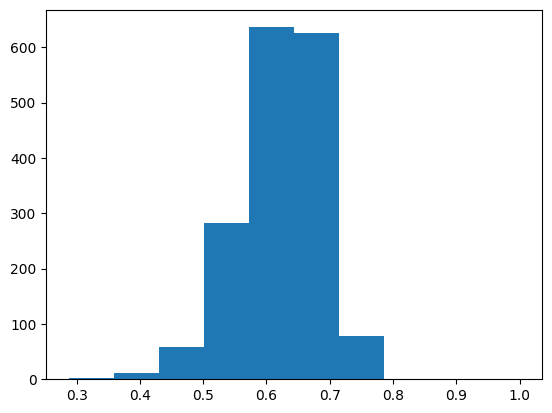

In [33]:
plt.hist(cosine_sim[0, :])
plt.show()

In [41]:
np.fill_diagonal(cosine_sim, -np.inf)

In [42]:
anime_names = df_intro['name']
cosine_sim_df = pd.DataFrame(cosine_sim, index=anime_names, columns=anime_names)
cosine_sim_df

name,青之壬生浪,香蕉喵遊世界,平凡職業造就世界最強 第三季,香格里拉・開拓異境～糞作獵手挑戰神作～ 第二季,魔王 2099,精靈幻想記 2,妖怪學校的菜鳥老師,唯願來世不相識,尋神的旅途,LoveLive! SuperStar!! 第三季,...,真 魔神英雄傳 魔神山篇,機動警察 劇場版 1,魔動王,麵包超人,魔神英雄傳,城市獵人 2,妙手小廚師,妖獸都市 1987 劇場版,城市獵人,魯邦三世 卡里奧斯特羅城
name,,,,,,,,,,,,,,,,,,,,,
青之壬生浪,-inf,0.424034,0.655018,0.621958,0.668415,0.720446,0.585117,0.690709,0.748385,0.597658,...,0.646993,0.609509,0.611188,0.587204,0.672901,0.678804,0.619997,0.674308,0.678804,0.586835
香蕉喵遊世界,0.424034,-inf,0.470047,0.540836,0.437437,0.482559,0.497447,0.493421,0.495790,0.382507,...,0.477515,0.347038,0.511860,0.488414,0.562286,0.502331,0.359634,0.472129,0.502331,0.499949
平凡職業造就世界最強 第三季,0.655018,0.470047,-inf,0.677701,0.704929,0.727136,0.553861,0.633674,0.738904,0.590451,...,0.783064,0.549796,0.732758,0.495795,0.692080,0.545352,0.534458,0.713658,0.545352,0.656864
香格里拉・開拓異境～糞作獵手挑戰神作～ 第二季,0.621958,0.540836,0.677701,-inf,0.631125,0.628983,0.584172,0.574185,0.705855,0.533099,...,0.663680,0.538664,0.660844,0.498390,0.665174,0.616440,0.537611,0.630860,0.616440,0.605520
魔王 2099,0.668415,0.437437,0.704929,0.631125,-inf,0.669735,0.560579,0.586208,0.709165,0.593585,...,0.683453,0.566217,0.680656,0.519326,0.674878,0.626022,0.515432,0.631249,0.626022,0.554135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
城市獵人 2,0.678804,0.502331,0.545352,0.616440,0.626022,0.593844,0.570868,0.583633,0.642596,0.456709,...,0.560780,0.549500,0.532140,0.599330,0.574368,-inf,0.557371,0.564266,1.000000,0.556087
妙手小廚師,0.619997,0.359634,0.534458,0.537611,0.515432,0.577996,0.553774,0.610455,0.570151,0.479895,...,0.548049,0.450901,0.477138,0.528179,0.587293,0.557371,-inf,0.561944,0.557371,0.483093
妖獸都市 1987 劇場版,0.674308,0.472129,0.713658,0.630860,0.631249,0.687667,0.560490,0.678534,0.744028,0.484740,...,0.741274,0.546725,0.670540,0.522970,0.711268,0.564266,0.561944,-inf,0.564266,0.629536


In [47]:
df_all_anime['intro'].fillna(df_all_anime['name'])[df_all_anime['intro'].isna()]

1180                              傷物語 II 熱血篇
1287                            飆速宅男 Re：ROAD
1300                 超人力霸王銀河 S 劇場版 決戰！超人10勇士
1334             劇場版 假面騎士 鎧武 足球大決戰！黃金的果實爭奪盃！
1335       烈車戰隊特急者 THE MOVIE Galaxy Line SOS
1362             平成騎士對昭和騎士 假面騎士大戰 feat. 超級戰隊
1413    特命戰隊 Go Busters VS 海賊戰隊豪快者 THE MOVIE
1518                          侍戰隊 VS 炎神戰隊轟音者
1530              超．假面騎士電王&Decade NEO世代 鬼島戰艦
1534                            炎神戰隊 VS 獸拳戰隊
1542                       再會了假面騎士電王 最後的倒數計時
1546                              炎神戰隊轟音者劇場版
1547                             假面騎士牙 魔界城之王
1553                         獸拳戰隊激氣連者 VS 冒險者
1560                            假面騎士電王 俺、誕生！
1568                         轟轟戰隊冒險者 VS 超級戰隊
1611                            爆龍戰隊 VS 忍風戰隊
1621                                 爆龍戰隊電影版
1627                            忍風戰隊 vs 百獸戰隊
1635                                 忍風戰隊電影版
1649                                 百獸戰隊電影版
1650                            百獸戰隊 VS 超級戰隊
1659      

In [ ]:
# Extract feature vectors as a 2D array
df_sub = df_intro[:100]
features = np.vstack(df_sub['intro_feature'])
features

In [ ]:
# Calculate cosine similarity
cosine_sim = cosine_similarity(features)

# Convert to distance matrix
distance_matrix = 1 - cosine_sim
distance_matrix

In [ ]:
# Apply MDS
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
mds_coords = mds.fit_transform(distance_matrix)

# Add the 2D coordinates to the DataFrame
df_sub['x'] = mds_coords[:, 0]
df_sub['y'] = mds_coords[:, 1]

In [ ]:
# Plot the MDS results
plt.figure(figsize=(10, 6))
plt.scatter(df_sub['x'], df_sub['y'], s=50, c='blue', alpha=0.7)

# Annotate points with anime names
for i, name in enumerate(df_sub['name']):
    plt.text(df_sub['x'][i], df_sub['y'][i], i, fontsize=9)

plt.title("MDS Visualization of Anime Intros")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()

In [ ]:
cosine_sim[29, 90]

In [ ]:
df_sub.iloc[[29, 90]]

In [ ]:
df_sub.loc[27, 'intro']

In [ ]:
df_sub.loc[77, 'intro']

In [ ]:
df_sub['name']

In [ ]:
from modules.recommend import AnimeRecommend

In [ ]:
ar = AnimeRecommend()

In [ ]:
ar.compute_similarity_score()

In [13]:
df_similar = pd.read_csv('data/anime_type_similarity.csv')

In [16]:
df_similar = df_similar.set_index('name')

In [17]:
df_similar.iloc[0,0]

np.float64(-inf)

In [34]:
anime_intro_similarity = pd.read_csv('data/anime_intro_similarity.csv')
anime_intro_similarity = anime_intro_similarity.set_index('name')
anime_intro_similarity.head()

,青之壬生浪,香蕉喵遊世界,平凡職業造就世界最強 第三季,香格里拉・開拓異境～糞作獵手挑戰神作～ 第二季,魔王 2099,精靈幻想記 2,妖怪學校的菜鳥老師,唯願來世不相識,尋神的旅途,LoveLive! SuperStar!! 第三季,...,真 魔神英雄傳 魔神山篇,機動警察 劇場版 1,魔動王,麵包超人,魔神英雄傳,城市獵人 2,妙手小廚師,妖獸都市 1987 劇場版,城市獵人,魯邦三世 卡里奧斯特羅城
name,,,,,,,,,,,,,,,,,,,,,
青之壬生浪,-inf,0.424034,0.655018,0.621958,0.668415,0.720446,0.585117,0.690709,0.748385,0.597658,...,0.646993,0.609509,0.611188,0.587204,0.672901,0.678804,0.619997,0.674308,0.678804,0.586835
香蕉喵遊世界,0.424034,-inf,0.470047,0.540836,0.437437,0.482559,0.497447,0.493421,0.495790,0.382507,...,0.477515,0.347038,0.511860,0.488414,0.562286,0.502331,0.359634,0.472129,0.502331,0.499949
平凡職業造就世界最強 第三季,0.655018,0.470047,-inf,0.677701,0.704929,0.727136,0.553861,0.633674,0.738904,0.590451,...,0.783064,0.549796,0.732758,0.495795,0.692080,0.545352,0.534458,0.713658,0.545352,0.656864
香格里拉・開拓異境～糞作獵手挑戰神作～ 第二季,0.621958,0.540836,0.677701,-inf,0.631125,0.628983,0.584172,0.574185,0.705855,0.533099,...,0.663680,0.538664,0.660844,0.498390,0.665174,0.616440,0.537611,0.630860,0.616440,0.605520
魔王 2099,0.668415,0.437437,0.704929,0.631125,-inf,0.669735,0.560579,0.586208,0.709165,0.593585,...,0.683453,0.566217,0.680656,0.519326,0.674878,0.626022,0.515432,0.631249,0.626022,0.554135


In [35]:
anime_type_similarity = pd.read_csv('data/anime_type_similarity.csv')
anime_type_similarity = anime_type_similarity.set_index('name')
anime_type_similarity.head()

,青之壬生浪,香蕉喵遊世界,平凡職業造就世界最強 第三季,香格里拉・開拓異境～糞作獵手挑戰神作～ 第二季,魔王 2099,精靈幻想記 2,妖怪學校的菜鳥老師,唯願來世不相識,尋神的旅途,LoveLive! SuperStar!! 第三季,...,真 魔神英雄傳 魔神山篇,機動警察 劇場版 1,魔動王,麵包超人,魔神英雄傳,城市獵人 2,妙手小廚師,妖獸都市 1987 劇場版,城市獵人,魯邦三世 卡里奧斯特羅城
name,,,,,,,,,,,,,,,,,,,,,
青之壬生浪,-inf,0.0,0.000000,0.000000,0.000000,0.000000,0.142857,0.0,0.000000,0.166667,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
香蕉喵遊世界,0.0,-inf,0.000000,0.000000,0.000000,0.000000,0.125000,0.0,0.000000,0.000000,...,0.142857,0.000000,0.125000,0.5,0.166667,0.000000,0.166667,0.000000,0.000000,0.000000
平凡職業造就世界最強 第三季,0.0,0.0,-inf,0.600000,0.428571,0.800000,0.000000,0.0,0.333333,0.000000,...,0.500000,0.142857,0.250000,0.0,0.333333,0.166667,0.000000,0.166667,0.166667,0.400000
香格里拉・開拓異境～糞作獵手挑戰神作～ 第二季,0.0,0.0,0.600000,-inf,0.333333,0.400000,0.000000,0.0,0.500000,0.000000,...,0.750000,0.200000,0.142857,0.0,0.500000,0.250000,0.000000,0.250000,0.250000,0.666667
魔王 2099,0.0,0.0,0.428571,0.333333,-inf,0.285714,0.000000,0.0,0.142857,0.000000,...,0.285714,0.333333,0.250000,0.0,0.142857,0.166667,0.000000,0.166667,0.166667,0.166667
